In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = './telco.csv'
telco_data = pd.read_csv(data_path)

# Step 1: Display basic information about the dataset
print("Basic Information:")
print(telco_data.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           70

In [4]:
# Step 2: Check for missing values
print("\nMissing Values:")
print(telco_data.isnull().sum())



Missing Values:
Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service 

In [5]:
# Step 3: Basic statistics of the dataset
print("\nDescriptive Statistics:")
print(telco_data.describe())


Descriptive Statistics:
               Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude     Population  Number of Referrals  Tenure in Months  \
count  7043.000000    7043.000000          7043.000000       7043.000000   
mean   -119.756684   22139.603294             1.951867         32.386767   
std       2.154425   21152.392837             3.001199         24.542061   
min    -124.301372      11.0000

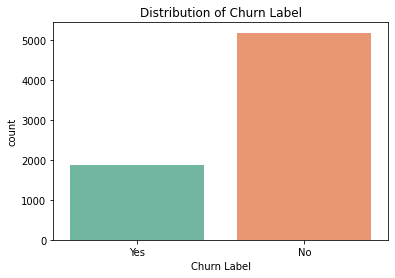

In [7]:
# Step 4: Distribution of the target variable (Churn Label)
sns.countplot(data=telco_data, x='Churn Label', hue='Churn Label', palette='Set2', legend=False)
plt.title("Distribution of Churn Label")
plt.show()

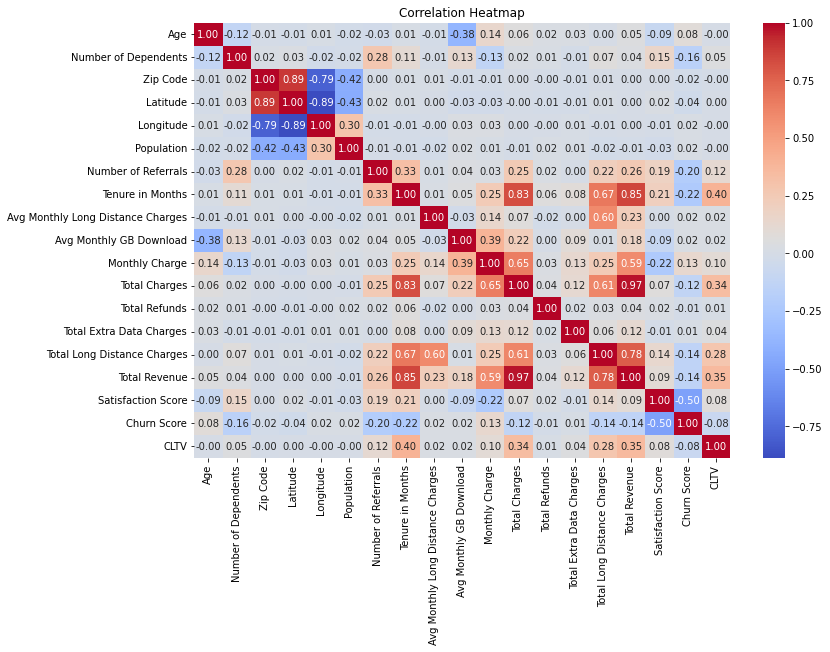

In [8]:
# Step 5: Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = telco_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

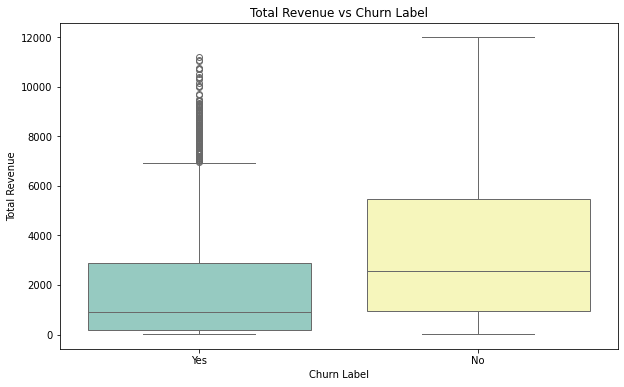

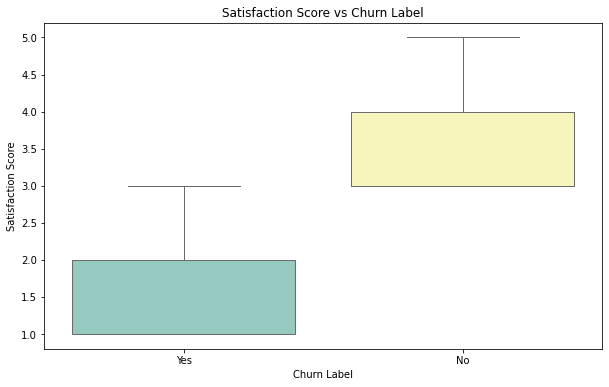

In [10]:
# Step 6: Visualizing relationships between key features and churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=telco_data, x='Churn Label', y='Total Revenue', hue='Churn Label', palette='Set3', dodge=False)
plt.title("Total Revenue vs Churn Label")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=telco_data, x='Churn Label', y='Satisfaction Score', hue='Churn Label', palette='Set3', dodge=False)
plt.title("Satisfaction Score vs Churn Label")
plt.show()

In [11]:
# Step 7: Preparing data for feature engineering
# Convert categorical features to numerical via one-hot encoding
categorical_features = ['Gender', 'Married', 'Dependents', 'Churn Category', 'Churn Reason']
telco_data_encoded = pd.get_dummies(telco_data, columns=categorical_features, drop_first=True)

In [13]:
# Step 8: Handle missing data (if any)
numeric_columns = telco_data_encoded.select_dtypes(include=['number']).columns
telco_data_encoded[numeric_columns] = telco_data_encoded[numeric_columns].fillna(telco_data_encoded[numeric_columns].median())

In [14]:
# Step 9: Standardize numerical features
from sklearn.preprocessing import StandardScaler
numerical_features = ['Total Revenue', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Satisfaction Score', 'CLTV']
scaler = StandardScaler()
telco_data_encoded[numerical_features] = scaler.fit_transform(telco_data_encoded[numerical_features])

In [16]:
# Step 10: Save the processed dataset
processed_path = './processed_telco.csv'
telco_data_encoded.to_csv(processed_path, index=False)
print(f"Processed dataset saved to {processed_path}")

Processed dataset saved to ./processed_telco.csv
